In [2]:
pwd

'/Users/amischel/Desktop/BAHAMAS-mock-weak-lensing'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import Planck18
from astropy.cosmology import WMAP9

In [4]:
data = np.load("/Users/amischel/Downloads/BAHAMAS_cutouts/CDMb/GrNm_001.npz")

Note, masses in $M_\odot$, distances in co-moving $h^{-1} \mathrm{Mpc}$

`CoP` is "Center of Potential", which is the location of the most gravitationally-bound particle

Let's have a look at what is in the data file

In [5]:
data.files

['R200',
 'CoP',
 'gas_pos',
 'bh_pos',
 'Mfof',
 'star_pos',
 'gas_mass',
 'dm_mass',
 'bh_mass',
 'M200',
 'star_mass',
 'dm_pos']

In [6]:
h = 0.700

dm_mass = (data['dm_mass'])*u.solMass
bh_mass = data['bh_mass']*u.solMass
gas_mass = data['gas_mass']*u.solMass
star_mass = data['star_mass']*u.solMass

CoP = (data['CoP']*h)*u.Mpc

dm_pos = (data['dm_pos']*h)*u.Mpc
bh_pos = (data['bh_pos']*h)*u.Mpc
gas_pos = (data['gas_pos']*h)*u.Mpc
star_pos = (data['star_pos']*h)*u.Mpc

In [7]:
print(bh_mass)
print(bh_pos)
print(CoP)

[1.18768024e+09 1.16949305e+09 1.22520551e+09 ... 1.12013902e+09
 1.09459566e+09 1.09429508e+09] solMass
[[177.76978302 265.01218567   5.11477094]
 [178.3969696  265.1318573    5.02841349]
 [179.3885437  265.74837341   7.54550114]
 ...
 [184.08147888 267.90254822   5.71379967]
 [184.07857361 267.8742218    5.72562437]
 [184.07718506 267.98252869   5.76327877]] Mpc
[183.92611084 267.86298523   5.336519  ] Mpc


So all DM particles appear to have the same mass. But this is not true of other particle types.

Text(0, 0.5, 'number of particles')

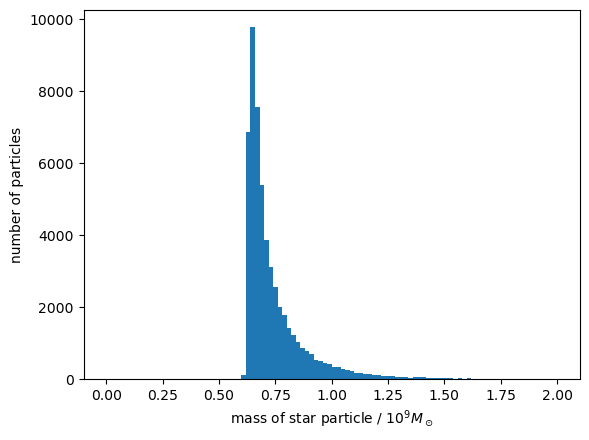

In [8]:
plt.hist(star_mass/1e9, bins=100, range=(0,2))
plt.xlabel('mass of star particle / $10^9 M_\odot$')
plt.ylabel('number of particles')

Let's have a quick look at the distribution of DM particles (projected along the $z$-axis)

In [9]:
print(dm_pos)

a = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[16,17,18]])
a[:,0]

[[177.88742523 266.45881958   1.45163586]
 [178.16924744 266.82855835   1.33620248]
 [178.16571198 266.04962463   1.59887371]
 ...
 [184.28760376 268.03268738   5.81528196]
 [184.30219421 268.04170227   5.86449003]
 [184.27967834 268.07705688   5.8598424 ]] Mpc


array([ 1,  4,  7, 10, 13, 16])

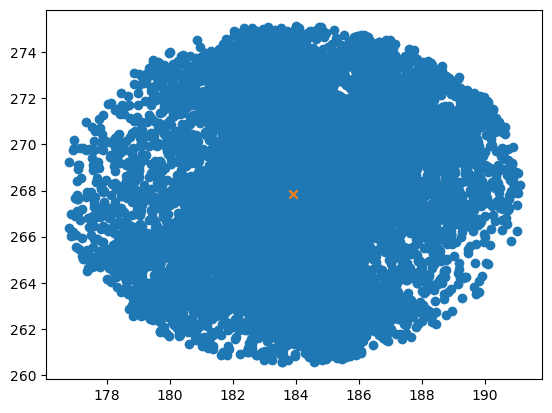

In [10]:
plt.scatter(dm_pos[::10,0], dm_pos[::10,1]) # plotting 1/10 of the data, looking only at x and y coords (so everything appears to be on the same plane)

plt.scatter(CoP[0], CoP[1],marker='x')

Can't learn a great deal from this, let's count the number of particles in 2D pixels

In [11]:
a = np.array([[1,2],[1,2],[0,3],[1,2],[1,2],[9,9]])

#dmcounts, xcount, ycount 
lo = np.histogram2d(a[:,0], a[:,1], bins = [3,3], range=[[0,9],[0,9]])
#plt.imshow(dmcounts)
lo

(array([[4., 1., 0.],
        [0., 0., 0.],
        [0., 0., 1.]]),
 array([0., 3., 6., 9.]),
 array([0., 3., 6., 9.]))

In [12]:
hfov = 5*h # "half the fielf of view"
#hfov = data['R200']
DMcounts, xedges, yedges = np.histogram2d(dm_pos[:,0]- CoP[0], dm_pos[:,1]- CoP[1],range=[[-3*hfov,3*hfov],[-3*hfov,3*hfov]],bins=128)

# cat = DMcounts
# print(cat)
# print('============')
# print(cat.T)
# # I believe .T is just the transpose of the previous array

Text(0.5, 1.0, 'Count')

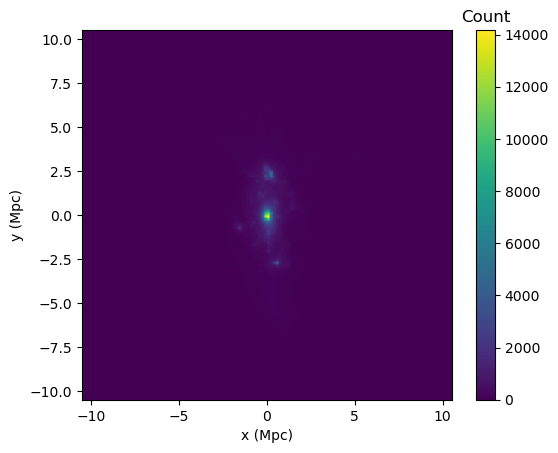

In [13]:
plt.imshow(DMcounts.T, origin='lower', extent=[-3*hfov, 3*hfov, -3*hfov, 3*hfov])
plt.xlabel('x (Mpc)')
plt.ylabel('y (Mpc)')
dm_color = plt.colorbar()
dm_color.ax.set_title('Count')

The densest regions are much denser than the less dense regions, so we don't see much here! Let's plot the log of the number of particles (add 1e-5 to avoid log(0)).

In [14]:
#hfov = data['R200']

Text(0.5, 1.0, 'Count')

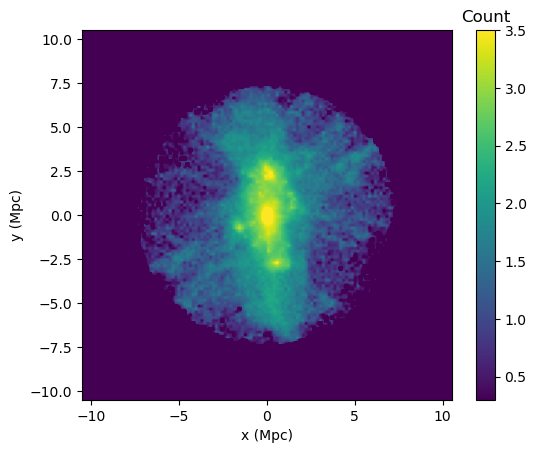

In [15]:
plt.imshow(np.log10(DMcounts+1e-5).T, origin='lower', extent=[-3*hfov,3*hfov,-3*hfov,3*hfov],vmin=0.3,vmax=3.5)
plt.xlabel('x (Mpc)')
plt.ylabel('y (Mpc)')
dm_color = plt.colorbar()
dm_color.ax.set_title('Count')

#### Things to do
- Incorporate information on particle masses, and the pixel area, to get $\Sigma(x,y)$ (hint: `np.histogram2d` can take a `weights` argument) (DONE)
- Make maps of the stars, gas, and black holes (DONE)
- Make different projections (along the $x$, $y$, and $z$ axes, but also, how would you pick a random line-of-sight that was't necessarily a simulation axis) (DONE)
- Look at other systems
- Place this mass distribution at $z_l = 0.3$, and find $\kappa(x,y)$ for a source at $z_s = 1.0$, also find $\kappa(\theta_x,\theta_y)$ (i.e. the convergence as a function of angle on the sky). Note that BAHAMAS used a WMAP9 cosmology with $h=0.700$.

Calculating Sigma

In [ ]:
data.files

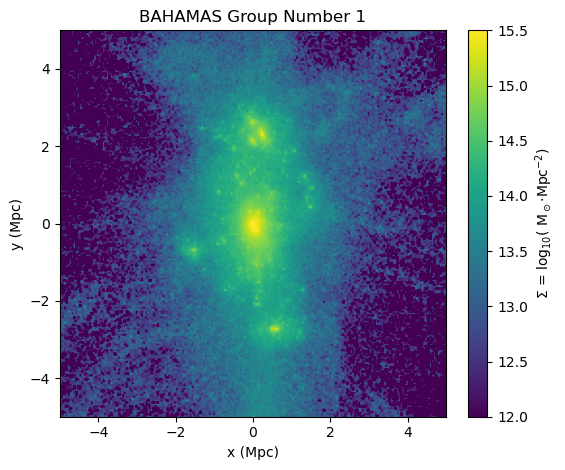

In [43]:
# Calculate Sigma (x,y)
## add together the weighted contributions from stars, gas, black holes, and dark matter

bins = 200
STARS_weighted, xedges_stars, yedges_stars = np.histogram2d(star_pos[:,0]-CoP[0], star_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=bins, density=False, weights=star_mass[:])
GAS_weighted, xedges_gas, yedges_gas = np.histogram2d(gas_pos[:,0]-CoP[0], gas_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=bins, density=False, weights=gas_mass[:])
BH_weighted, xedges_bh, yedges_bh = np.histogram2d(bh_pos[:,0]-CoP[0], bh_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=bins, density=False, weights=bh_mass[:])
DM_weighted, xedges_dm, yedges_dm = np.histogram2d(dm_pos[:,0]-CoP[0], dm_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=bins, density=False, weights=dm_mass[:])

bin_area = (xedges_stars[1] - xedges_stars[0])**2

Sigma = (STARS_weighted + GAS_weighted + BH_weighted + DM_weighted)/bin_area

# plt.hist(np.log10(Sigma.flatten()+1e-9), bins=bins)
# plt.xlabel('mass of star particle / $10^9 M_\odot$')
# plt.ylabel('number of particles')

sigma_plot = plt.imshow(np.log10((Sigma+(1e-5)*u.solMass/u.Mpc**2).to_value(u.solMass/u.Mpc**2)).T, origin='lower', extent=[-hfov,hfov,-hfov,hfov], vmin=12, vmax=15.5)
plt.xlabel('x (Mpc)')
plt.ylabel('y (Mpc)')
plt.colorbar(sigma_plot,fraction=0.046, pad=0.04, label='$\Sigma$ = log$_{10}$( M$_\odot$$\cdot$$\mathrm{Mpc}^{-2}$)') 
plt.title('BAHAMAS Group Number 1')
plt.tight_layout()

5.749602102137826 kg / m2


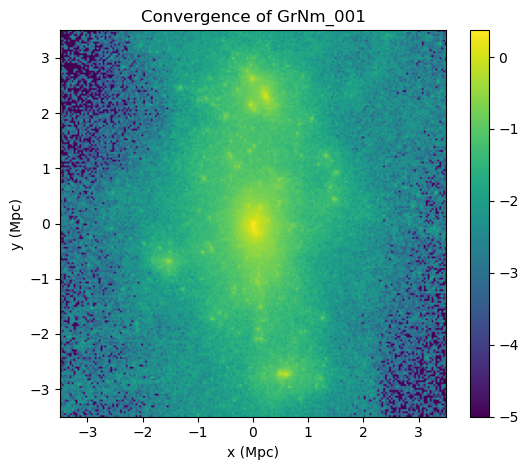

In [18]:
zlens = 0.3
zsource = 1.0

dL = Planck18.angular_diameter_distance(zlens) # distance from the viewer to the lens plane
dS = Planck18.angular_diameter_distance(zsource) # distance from the viewer to the source plane
dLS = Planck18.angular_diameter_distance_z1z2(zlens, zsource) # distance from the lens plane to the source

sigma_crit = (const.c**2/(4*np.pi*const.G) * dS/(dL*dLS)).decompose()

convergence = Sigma/sigma_crit

convergence_plot = plt.imshow((np.log10((convergence.decompose() + 1e-5))).T, origin='lower', extent=[-hfov,hfov,-hfov,hfov])
plt.xlabel('x (Mpc)')
plt.ylabel('y (Mpc)')
plt.colorbar(convergence_plot,fraction=0.046, pad=0.04, label='') 
plt.title('Convergence of GrNm_001')
plt.tight_layout()
print(sigma_crit)

Plotting Stars, Gas, and Black Holes

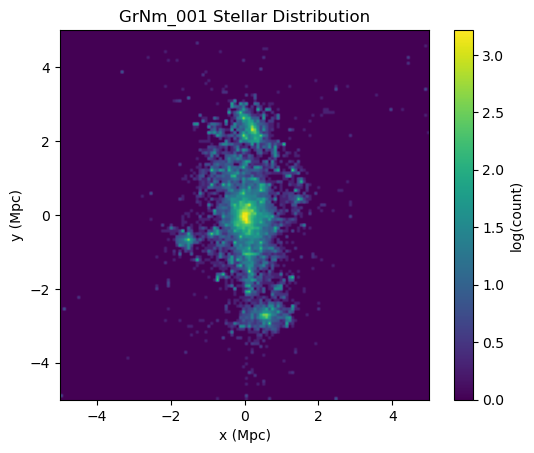

In [19]:
# Map of stars

hfov = 5 # Mpc, "half the fielf of view"
STARcounts, xedges, yedges = np.histogram2d(star_pos[:,0]-CoP[0], star_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=128)

plt.imshow(np.log10(STARcounts+1).T, origin='lower', extent=[-hfov,hfov,-hfov,hfov])
plt.xlabel('x (Mpc)')
plt.ylabel('y (Mpc)')
plt.title('GrNm_001 Stellar Distribution')
plt.colorbar(label = 'log(count)')

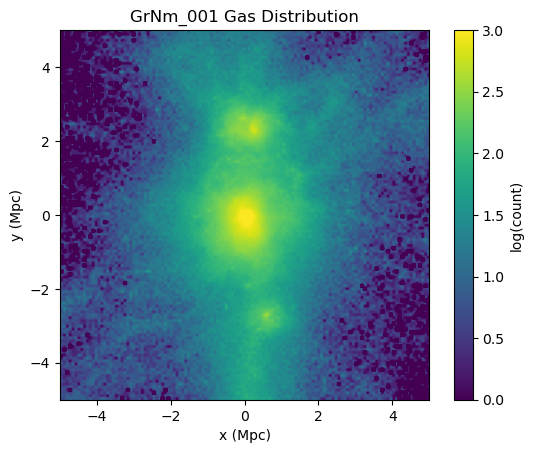

In [20]:
# Map of gas

data.files

data['gas_pos']

hfov = 5 # Mpc, "half the fielf of view"
GAScounts, xedges, yedges = np.histogram2d(gas_pos[:,0]-CoP[0], gas_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=128)

plt.imshow(np.log10(GAScounts+1e-5).T, origin='lower', extent=[-hfov,hfov,-hfov,hfov],vmin=0,vmax=3)
plt.xlabel('x (Mpc)')
plt.ylabel('y (Mpc)')
plt.title('GrNm_001 Gas Distribution')
plt.colorbar(label = 'log(count)')

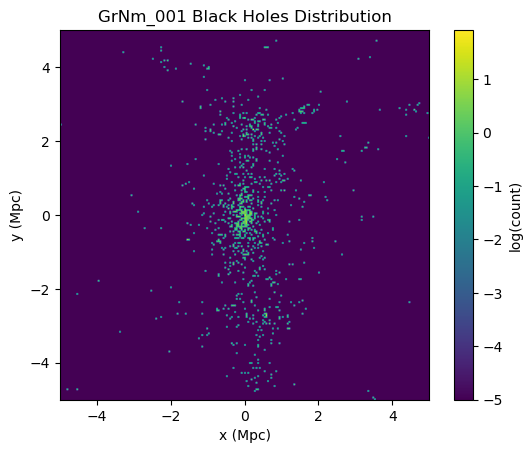

In [21]:
# Map of black holes

data.files

hfov = 5 # Mpc, "half the fielf of view"
BHcounts, xedges, yedges = np.histogram2d(bh_pos[:,0]-CoP[0], bh_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=225)

plt.imshow(np.log10(BHcounts+1e-5).T, origin='lower', extent=[-hfov,hfov,-hfov,hfov])
plt.xlabel('x (Mpc)')
plt.ylabel('y (Mpc)')
plt.title('GrNm_001 Black Holes Distribution')
plt.colorbar(label = 'log(count)')

Projecting along different axes

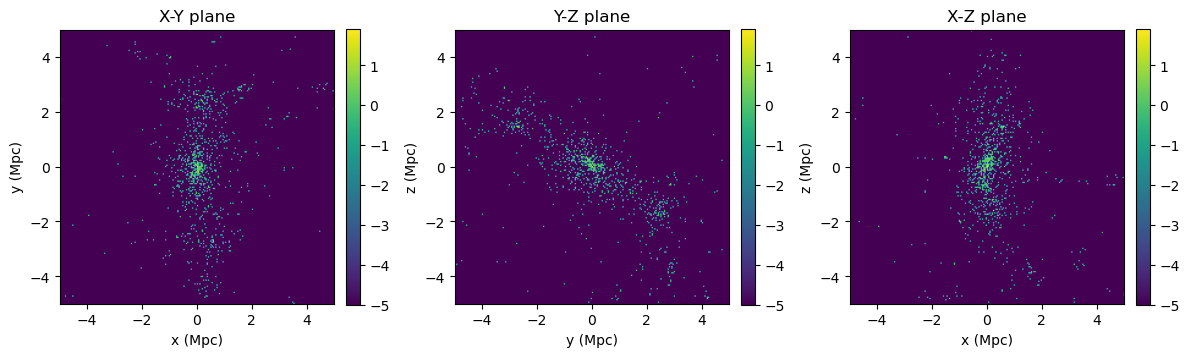

In [22]:
# Projecting Black Holes onto x-y plane, y-z plane, and x-z plane

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,12))

hfov = 5 # Mpc, "half the fielf of view"
BHcounts_xy, xedges_xy, yedges_xy = np.histogram2d(bh_pos[:,0]-CoP[0], bh_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=225)
BHcounts_yz, yedges_yz, zedges_yz = np.histogram2d(bh_pos[:,1]-CoP[1], bh_pos[:,2]-CoP[2],range=[[-hfov,hfov],[-hfov,hfov]],bins=225)
BHcounts_xz, xedges_xz, zedges_xz = np.histogram2d(bh_pos[:,0]-CoP[0], bh_pos[:,2]-CoP[2],range=[[-hfov,hfov],[-hfov,hfov]],bins=225)

xy_bh = ax1.imshow(np.log10(BHcounts_xy+1e-5).T, origin='lower', extent=[-hfov,hfov,-hfov,hfov])
ax1.set_title('X-Y plane')
ax1.set_xlabel('x (Mpc)')
ax1.set_ylabel('y (Mpc)')
plt.colorbar(xy_bh,fraction=0.046, pad=0.04)

yz_bh = ax2.imshow(np.log10(BHcounts_yz+1e-5).T, origin='lower', extent=[-hfov,hfov,-hfov,hfov])
ax2.set_title('Y-Z plane')
ax2.set_xlabel('y (Mpc)')
ax2.set_ylabel('z (Mpc)')
plt.colorbar(yz_bh,fraction=0.046, pad=0.04)

xz_bh = ax3.imshow(np.log10(BHcounts_xz+1e-5).T, origin='lower', extent=[-hfov,hfov,-hfov,hfov])
ax3.set_title('X-Z plane')
ax3.set_xlabel('x (Mpc)')
ax3.set_ylabel('z (Mpc)')
plt.colorbar(xz_bh,fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

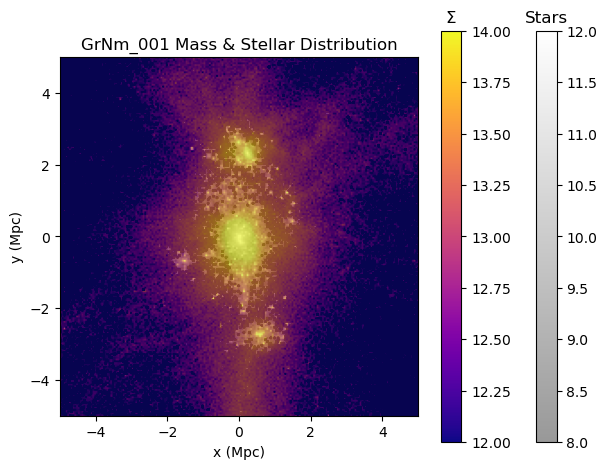

In [23]:
# Calculate Sigma (x,y)

# plot sigma!
# ==================
h = 0.700
extent=[-hfov,hfov,-hfov,hfov]
## add together the weighted contributions from stars, gas, and black holes

bins = 200
STARS_weighted, xedges_stars, yedges_stars = np.histogram2d(star_pos[:,0]-CoP[0], star_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=bins, density=False, weights=star_mass[:])
GAS_weighted, xedges_gas, yedges_gas = np.histogram2d(gas_pos[:,0]-CoP[0], gas_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=bins, density=False, weights=gas_mass[:])
BH_weighted, xedges_bh, yedges_bh = np.histogram2d(bh_pos[:,0]-CoP[0], bh_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=bins, density=False, weights=bh_mass[:])

bin_area = (xedges_stars[1] - xedges_stars[0])**2

Sigma = (STARS_weighted + GAS_weighted + BH_weighted)/bin_area

im1 = plt.imshow(np.log10((Sigma+(1e-5)*u.solMass/u.Mpc**2).to_value(u.solMass/u.Mpc**2)).T, origin='lower', cmap=plt.cm.plasma, extent=extent, vmin=12, vmax=14)

# =====================
# plot star masses over sigma so we can see where the stars are!

STARMASScounts, xedges, yedges = np.histogram2d(star_pos[:,0]-CoP[0], star_pos[:,1]-CoP[1],range=[[-hfov,hfov],[-hfov,hfov]],bins=bins, density=False, weights=star_mass[:])
im2 = plt.imshow(np.log10((STARMASScounts+1e-5*u.solMass).to_value(u.solMass)).T, origin = 'lower', cmap=plt.cm.gray, alpha=0.4, extent=extent, vmin=8, vmax=12)
plt.xlabel('x (Mpc)')
plt.ylabel('y (Mpc)')
plt.title('GrNm_001 Mass & Stellar Distribution')

# colorbars!
cb2 = plt.colorbar(im2)
cb2.ax.set_title('Stars')

cb1 = plt.colorbar(im1)
cb1.ax.set_title('$\Sigma$')

plt.tight_layout()
plt.show()

Questions


- intensity scale? how to use vmin/vmax properly
- why does my sigma plot look so strange? (shouldn't matter if the bin_area is divided or not because it's a constant)
- do my other plots look alright?
- how does hfov work again?